In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [2]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[2], polygon_example_1[4])]

In [3]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()

In [4]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()

In [5]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()

In [6]:
tested_polygon_one=[(1.2072123999147943,1.8801982924814096),(1.1097773378275086,1.518314513908014), 
                    (0.8824288596238423,1.1812172955108782),(0.388036137180949,0.7846323326907186), 
                    (0.0488177728770659,0.6904434040209306),(1.784605360432042,0.14018176810795915)]
tested_polygon_two=[(1, 0), (3, 2), (4, 5), (2, 7), (0, 5), (-1, 2)]
tested_polygon_three=[(5.685483870967742, 9.096320346320347), (2.0766129032258065, 9.177489177489178), (3.2459677419354835, 7.012987012987013),
                       (1.935483870967742, 5.146103896103897), (5.564516129032258, 4.740259740259741), (5.504032258064516, 5.470779220779221),
                         (3.3266129032258065, 5.903679653679654), (4.05241935483871, 7.067099567099568), (3.0645161290322585, 8.555194805194807),
                           (5.665322580645162, 8.636363636363637)]
tested_polygon_four=[(0.20503589910659457,0.0806940236849352),(1.5428220582154446,0.264114568989259),
                     (1.0376032177628527,0.4772789865050948),(1.676344180335058,0.7648030845497106),
                     (0.9546029796884983,0.9184797576425225),(1.6835615923415237,1.1861746075461304),
                     (0.8799505055947472,1.4101074084274302),(1.6789091182477726,1.8448141007986777),
                     (0.6164328764982593,1.9575823716432735)]
tested_polygon_five=[(0.9942987457240591,1.8603690443404017),(0.13903542295788587,0.9829248141007985),
                     (0.7525154435074616,1.2109611677223902),(0.8932549776335408,0.5912971633158908),
                     (0.5396017893167265,0.35334618562379494),(0.26173142706780106,0.5665106031396308),
                     (0.3555577831518538,0.0806940236849352),(1.5969526482639365,0.264114568989259),
                     (1.5753004122445398, 1.2803635362159183)]
tested_polygon_six=[[3.4274193548387095, 1.141774891774892], [7.379032258064516, 4.1991341991342], [4.193548387096774, 5.1190476190476195],
                       [7.379032258064516, 6.7694805194805205], [5.34274193548387, 7.743506493506494],
                       [7.802419354838708, 8.744588744588745], [3.0040322580645165, 9.637445887445889]]

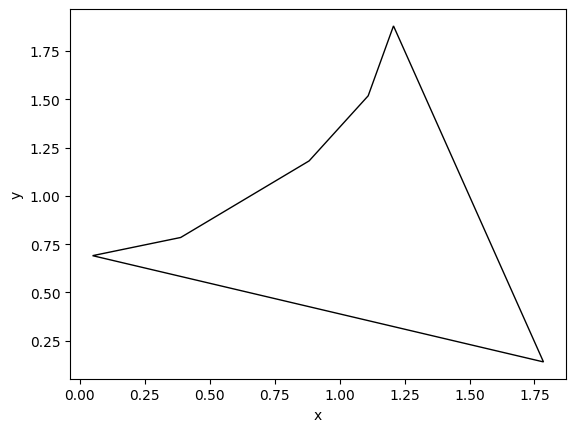

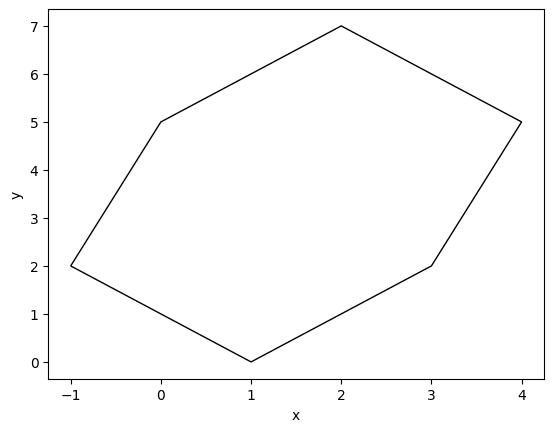

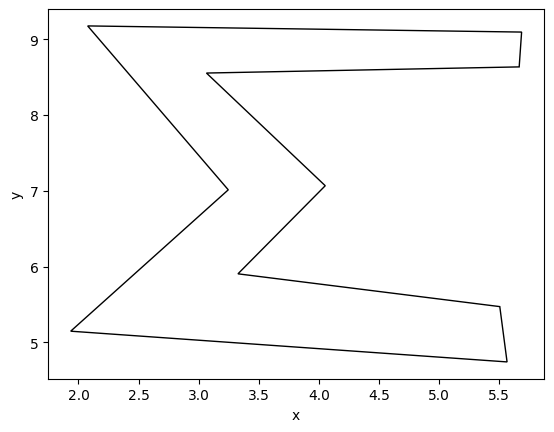

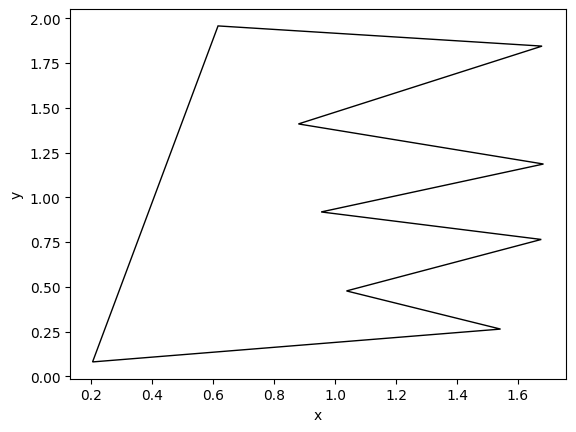

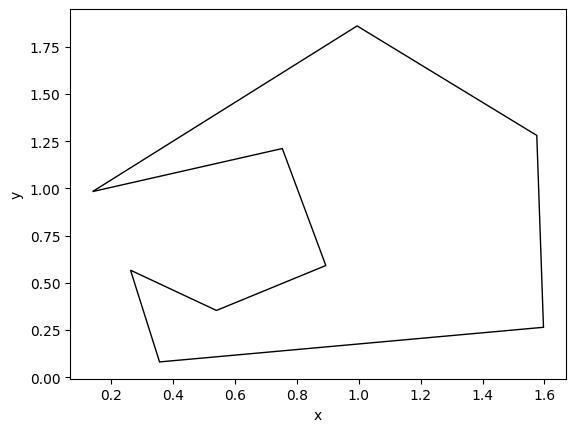

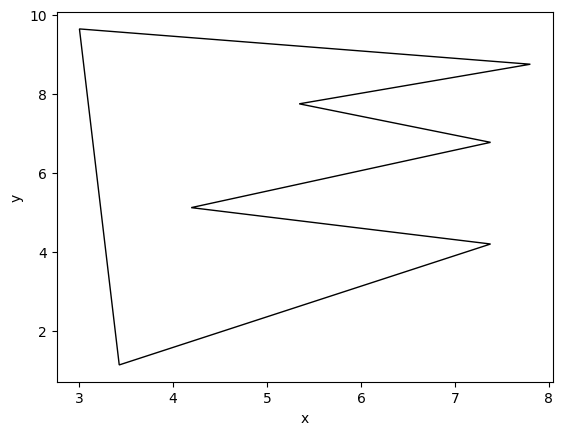

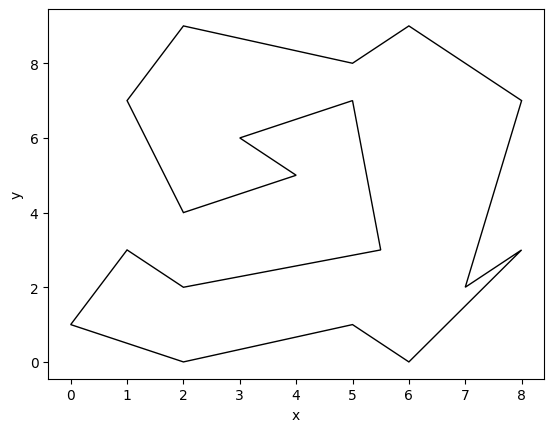

In [7]:
draw_polygon(tested_polygon_one)
draw_polygon(tested_polygon_two)
draw_polygon(tested_polygon_three)
draw_polygon(tested_polygon_four)
draw_polygon(tested_polygon_five)
draw_polygon(tested_polygon_six)
draw_polygon(polygon_example_2)

## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

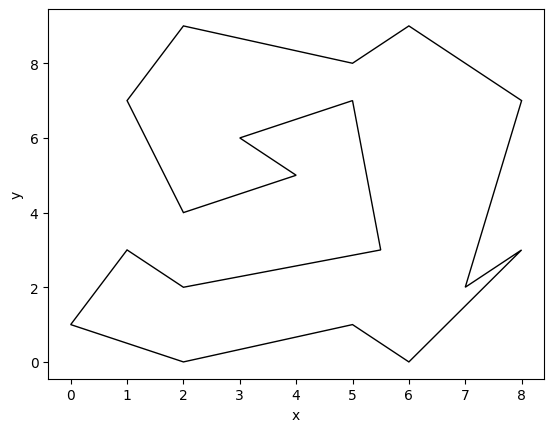

In [8]:
draw_polygon(polygon_example_2)

In [3]:
%matplotlib tk
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.widgets import Button
import json


polygons = []
current_polygon = []

def onclick(event):
    global current_polygon
    if event.button == 1:  
        current_polygon.append((event.xdata, event.ydata))
        ax.plot(event.xdata, event.ydata, 'bo')  
        fig.canvas.draw()
    elif event.button == 3: 
        if len(current_polygon) > 2:
            polygons.append(current_polygon)
            polygon_patch = Polygon(current_polygon, closed=True, edgecolor='r', fill=None)
            ax.add_patch(polygon_patch) 
        current_polygon = []  

def save_polygons(filename="polygons.json"):
    with open(filename, "w") as f:
        json.dump(polygons, f)
    print(f"Wielkąt zapisany do {filename}")

def load_polygons(filename="polygons.json"):
    global polygons
    try:
        with open(filename, "r") as f:
            polygons = json.load(f)
        redraw_polygons()
        print(f"Wielokąt załadowany z {filename}")
    except FileNotFoundError:
        print(f"Plik {filename} nie znaleziony")

def redraw_polygons():
    ax.clear()
    for poly in polygons:
        polygon_patch = Polygon(poly, closed=True, edgecolor='r', fill=None)
        ax.add_patch(polygon_patch)
        ax.plot(*zip(*poly), 'bo')  # Rysuj krawędzie
    fig.canvas.draw()

fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_title("Rysuj wielokąt (Lewy przycisk = Dodaj Punkt, Prawy Przycisk = Zamkni Wielokąt)")
fig.canvas.mpl_connect('button_press_event', onclick)

def save_callback(event):
    save_polygons()

def load_callback(event):
    load_polygons()

ax_save = plt.axes([0.7, 0.01, 0.1, 0.075])
btn_save = Button(ax_save, 'Zapisz')
btn_save.on_clicked(save_callback)

ax_load = plt.axes([0.81, 0.01, 0.1, 0.075])
btn_load = Button(ax_load, 'Załaduj')
btn_load.on_clicked(load_callback)

plt.show()


In [2]:
%matplotlib inline

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [11]:
def low_and_high_ind(polygon):
    low_ind = polygon.index(min(polygon, key=lambda x: x[1]))
    high_ind = polygon.index(max(polygon, key=lambda x: x[1]))
    return low_ind, high_ind

In [12]:
def left_chain_and_right_chain(polygon):
    left_chain = []
    right_chain = []
    low_ind, high_ind = low_and_high_ind(polygon)
    n = len(polygon)

    def chain_helper(left_bound, right_bound, chain):
        curr_ind = left_bound
        while curr_ind != right_bound:
            chain.append(polygon[curr_ind])
            curr_ind = (curr_ind + 1) % n

    chain_helper(low_ind, high_ind, left_chain)
    chain_helper(high_ind, low_ind, right_chain)

    return left_chain, right_chain
    

In [13]:
def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """
    left_chain, right_chain = left_chain_and_right_chain(polygon)

    if len(polygon) < 3:
        return False

    for i in range(1, len(left_chain)):
        if left_chain[i-1][1] > left_chain[i][1]:
            return False

    for i in range(1, len(right_chain)):
        if right_chain[i-1][1] < right_chain[i][1]:
            return False

    return True

Przeprowadź test poprawności powyższej funkcji.

In [14]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.001s


Sprawdź monotoniczność swojego wielokątu.

In [15]:
print(is_y_monotonic(tested_polygon_one))
print(is_y_monotonic(tested_polygon_two))
print(is_y_monotonic(tested_polygon_three))
print(is_y_monotonic(tested_polygon_four))
print(is_y_monotonic(tested_polygon_five))

True
True
True
True
False


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których zaczyna się monotoniczny spadek
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji.
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny.
- prawidłowy, pozostałe przypadki, jeden sąsiad powyżej, drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

In [16]:
%matplotlib inline

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [17]:
def orient(a,b,c):
    """
    Funkcja sprawdza, czy punkty a,b,c tworzą lewo- czy prawostronny skręt, obliczając wyznacznik odpowiedniej macierzy
    :param a: krotka współrzędnych (x, y) pierwszego punktu
    :param b: krotka współrzędnych (x, y) punktu, dla którego badamy rodzaj skrętu
    :param c: krotka współrzędnych (x, y) ostatniego punktu w układzie
    :return: wartość odpowiedniego wyznacznika macierzy, dodatnia jeżeli skręt jest lewostronny,
    ujemna jeżeli skręt jest prawostronny, w przeciwnym razie równa zero (punkty współliniowe)
    """
    return a[0]*c[1] + a[1]*b[0] + c[0]*b[1] - c[1]*b[0] - a[0]*b[1] - a[1]*c[0]

In [18]:
def color_vertex(polygon):
    """
    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    n = len(polygon)
    vertex_cat = [-1 for _ in range(n)]

    for i in range(n):
        p1, p2, p3 = polygon[i - 1], polygon[i % n], polygon[(i + 1) % n]

        if p2[1] < p1[1] and p2[1] < p3[1]:
            if orient(p1, p2, p3) < 0:
                vertex_cat[i] = 1
            else:
                vertex_cat[i] = 2
        elif p2[1] > p1[1] and p2[1] > p3[1]:
            if orient(p1, p2, p3) < 0:
                vertex_cat[i] = 0
            else:
                vertex_cat[i] = 3
        else:
            vertex_cat[i] = 4

    
    return vertex_cat

Przeprowadź test poprawności powyższej funkcji. 

In [19]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.001s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

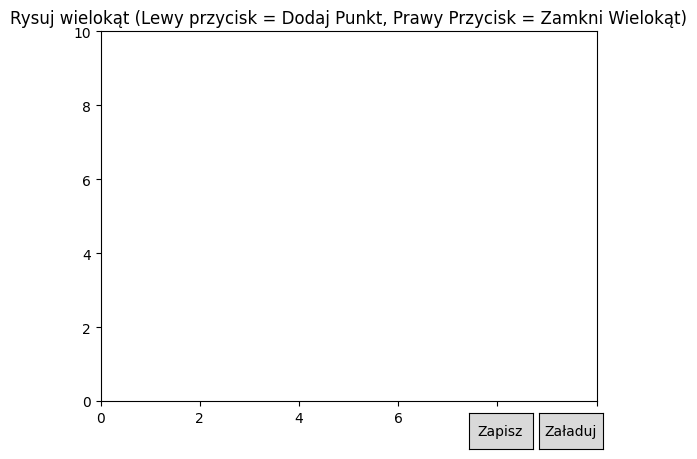

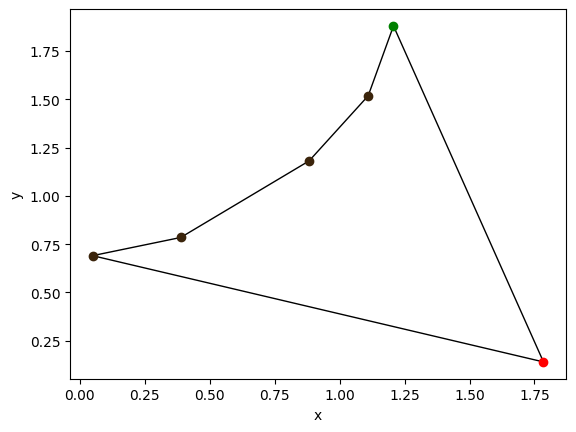

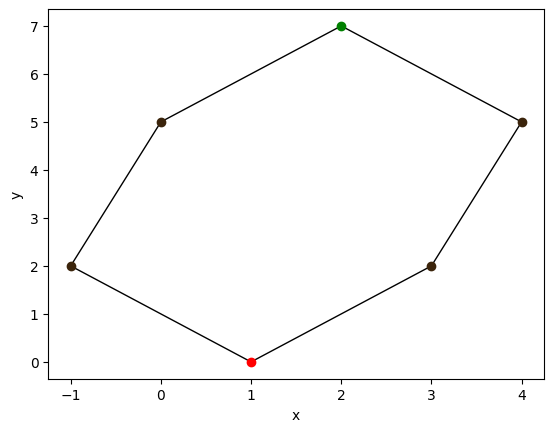

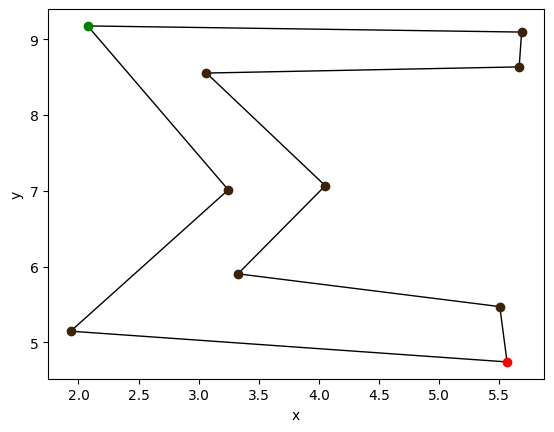

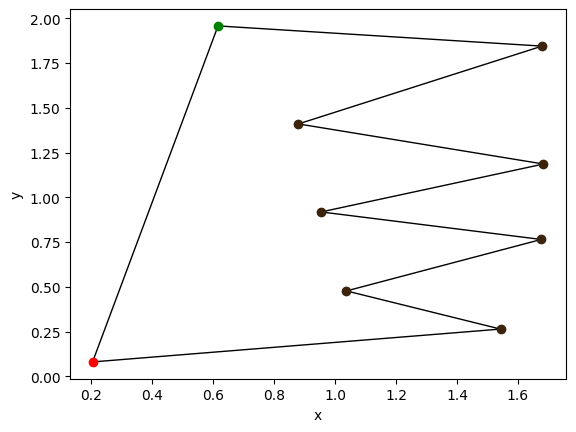

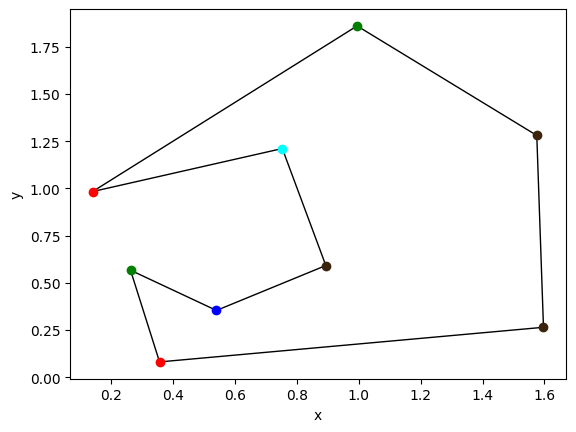

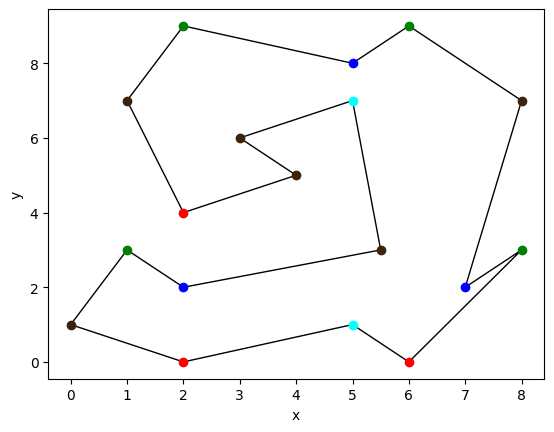

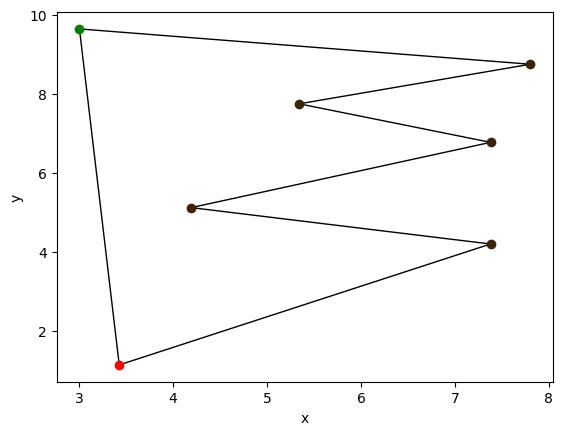

invalid command name "139791790629696process_stream_events"
    while executing
"139791790629696process_stream_events"
    ("after" script)


In [20]:
colors = color_vertex(tested_polygon_one)
draw_polygon_colors(tested_polygon_one, colors)
colors = color_vertex(tested_polygon_two)
draw_polygon_colors(tested_polygon_two, colors)
colors = color_vertex(tested_polygon_three)
draw_polygon_colors(tested_polygon_three, colors)
colors = color_vertex(tested_polygon_four)
draw_polygon_colors(tested_polygon_four, colors)
colors = color_vertex(tested_polygon_five)
draw_polygon_colors(tested_polygon_five, colors)
colors = color_vertex(polygon_example_2)
draw_polygon_colors(polygon_example_2, colors)
colors = color_vertex(tested_polygon_six)
draw_polygon_colors(tested_polygon_six, colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

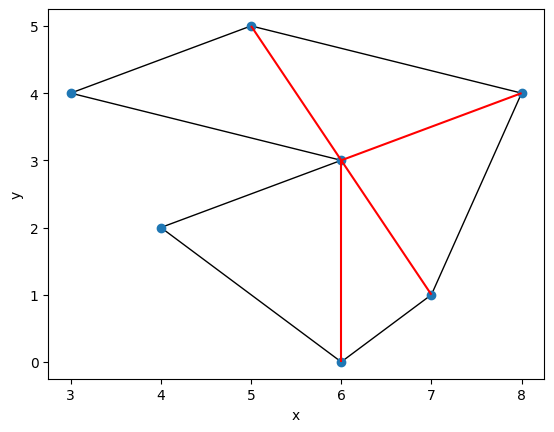

In [21]:
draw_polygon_tri(polygon_example_1, polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [22]:
def orient(p, q, r):
    return (q[0] - p[0]) * (r[1] - p[1]) - (q[1] - p[1]) * (r[0] - p[0])

def chainer(polygon):
    left_chain = []
    right_chain = []
    low_ind, high_ind = low_and_high_ind(polygon)
    n = len(polygon)

    def chain_helper(left_bound, right_bound, chain):
        curr_ind = left_bound
        while curr_ind != right_bound:
            chain.append((polygon[curr_ind], curr_ind))
            curr_ind = (curr_ind + 1) % n

    chain_helper(low_ind, high_ind, left_chain)
    chain_helper(high_ind, low_ind, right_chain)

    return left_chain, right_chain

def triangulation(polygon, extented=False):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki o indeksach 1 i 5 oraz 2 i 3
    jeśłi extented jest równe True zwróci dodtkowe liste krotek postaci (a, b, c) gdzie a, b, c to boki trójkąta tworzącego triangulacje
    """
    if not is_y_monotonic(polygon):
        return "Działa tylko dla wielkątów monotonicznych"

    def merge_chains():
        left_chain, right_chain = chainer(polygon)
        i = len(left_chain) - 1
        j = 0
        while i > -1 and j < len(right_chain):
            if left_chain[i][0][1] > right_chain[j][0][1]:
                vertices.append((left_chain[i][0], "l", left_chain[i][1]))
                i -= 1
            else:
                vertices.append((right_chain[j][0], "r", right_chain[j][1]))
                j += 1

        while i > -1:
            vertices.append((left_chain[i][0], "l", left_chain[i][1]))
            i -= 1
        
        while j < len(right_chain):
            vertices.append((right_chain[j][0], "r", right_chain[j][1]))
            j += 1

    def inwards_turn(p1, p2, p3, chain):
        if chain == 'r':
            return orient(p1, p2, p3) > 0
        return orient(p1, p2, p3) < 0

    def is_side(p1, p2):
        for i in range(len(polygon)):
            if (polygon[i] == p1 and polygon[(i + 1) % len(polygon)] == p2) or\
            (polygon[i] == p2 and polygon[(i + 1) % len(polygon)] == p1):
                return True
        return False

    n = len(polygon)
    vertices = []
    merge_chains()
    stack = []
    stack.append(vertices[0])
    stack.append(vertices[1])
    diagonals = []
    triangles = []

    for i in range(2, n):
        curr = vertices[i]
        if curr[1] == stack[-1][1]:
            while len(stack) >= 2 and inwards_turn(stack[-2][0], stack[-1][0], curr[0], curr[1]):
                if not is_side(curr[0], stack[-2][0]):
                    diagonals.append((curr[2], stack[-2][2]))
                    triangles.append((curr[2], stack[-1][2], stack[-2][2]))  
                stack.pop()
            stack.append(curr)
        else:
            while len(stack) > 0:
                if not is_side(curr[0], stack[-1][0]):
                    diagonals.append((curr[2], stack[-1][2])) 
                    triangles.append((curr[2], stack[-1][2], ((stack[-1][2] + 1) % n))) 
                stack.pop()
            stack.append(vertices[i-1])
            stack.append(vertices[i])

    if extented:
        return diagonals, triangles

    return diagonals

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


In [23]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.001s


Zwizualizuj powstały wielokąt podzielony na trójkąty.

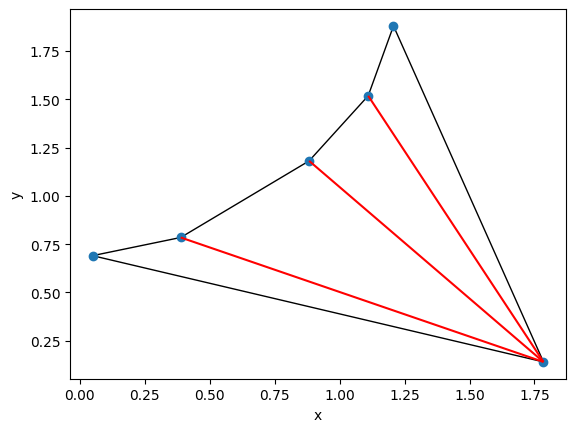

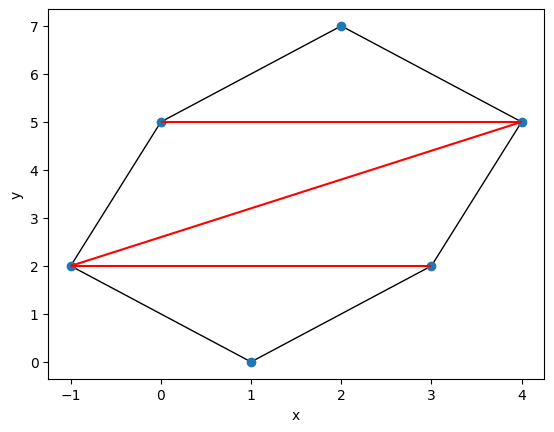

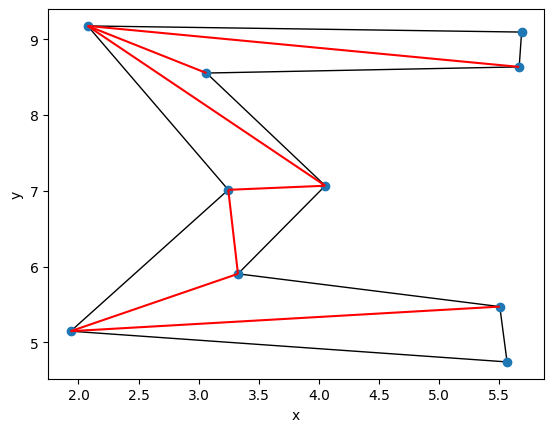

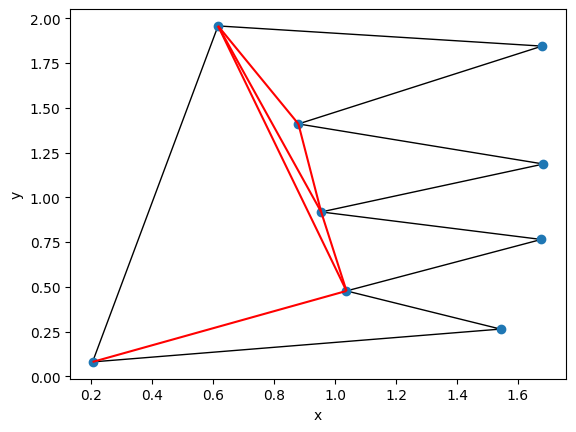

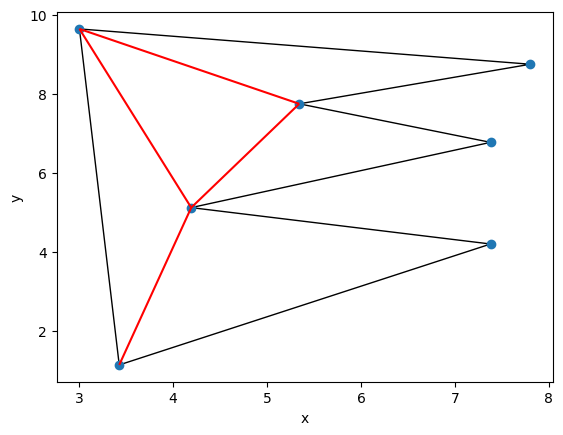

In [24]:
tri1 = triangulation(tested_polygon_one)
tri2 = triangulation(tested_polygon_two)
tri3 = triangulation(tested_polygon_three)
tri4 = triangulation(tested_polygon_four)
tri5 = triangulation(tested_polygon_five)
tri6 = triangulation(tested_polygon_six)


draw_polygon_tri(tested_polygon_one,[(tested_polygon_one[x],tested_polygon_one[y]) for (x,y) in tri1])
draw_polygon_tri(tested_polygon_two,[(tested_polygon_two[x],tested_polygon_two[y]) for (x,y) in tri2])
draw_polygon_tri(tested_polygon_three,[(tested_polygon_three[x],tested_polygon_three[y]) for (x,y) in tri3])
draw_polygon_tri(tested_polygon_four,[(tested_polygon_four[x],tested_polygon_four[y]) for (x,y) in tri4])
draw_polygon_tri(tested_polygon_six,[(tested_polygon_six[x],tested_polygon_six[y]) for (x,y) in tri6])

In [25]:
def triangulation_vis(polygon):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki o indeksach 1 i 5 oraz 2 i 3
    """
    if not is_y_monotonic(polygon):
        return "Działa tylko dla wielkątów monotonicznych"

    def merge_chains():
        left_chain, right_chain = chainer(polygon)
        i = len(left_chain) - 1
        j = 0
        while i > -1 and j < len(right_chain):
            if left_chain[i][0][1] > right_chain[j][0][1]:
                vertices.append((left_chain[i][0], "l", left_chain[i][1]))
                i -= 1
            else:
                vertices.append((right_chain[j][0], "r", right_chain[j][1]))
                j += 1

        while i > -1:
            vertices.append((left_chain[i][0], "l", left_chain[i][1]))
            i -= 1
        
        while j < len(right_chain):
            vertices.append((right_chain[j][0], "r", right_chain[j][1]))
            j += 1

    def inwards_turn(p1, p2, p3, chain):
        if chain == 'r':
            return orient(p1, p2, p3) > 0
        return orient(p1, p2, p3) < 0

    def is_side(p1, p2):
        for i in range(len(polygon)):
            if (polygon[i] == p1 and polygon[(i + 1) % len(polygon)] == p2) or\
            (polygon[i] == p2 and polygon[(i + 1) % len(polygon)] == p1):
                return True
        return False

    vis = Visualizer()
    vis.add_polygon(polygon)
    vis.add_point(polygon, color='red')
    n = len(polygon)
    vertices = []
    merge_chains()
    stack = []
    stack.append(vertices[0])
    stack.append(vertices[1])
    diagonals = []

    for i in range(2, len(vertices)):
        curr = vertices[i]
        if curr[1] == stack[-1][1]:
            while len(stack) >= 2 and inwards_turn(stack[-2][0], stack[-1][0], curr[0], curr[1]):
                if not is_side(curr[0], stack[-2][0]):
                    vis.add_line_segment((curr[0], stack[-2][0]), color='black')
                stack.pop()
            stack.append(curr)
        else:
            while len(stack) > 0:
                if not is_side(curr[0], stack[-1][0]):
                    vis.add_line_segment((curr[0], stack[-1][0]), color='black')  
                stack.pop()
            stack.append(vertices[i-1])
            stack.append(vertices[i])

    return vis

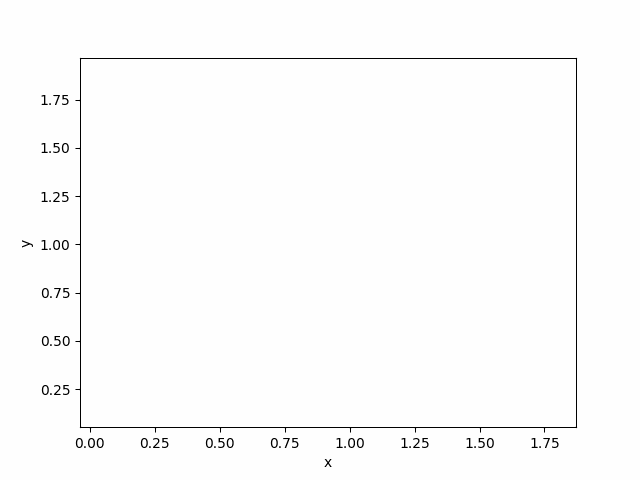

In [26]:
triang_vis=triangulation_vis(tested_polygon_one)
triang_vis.show_gif(interval=500)

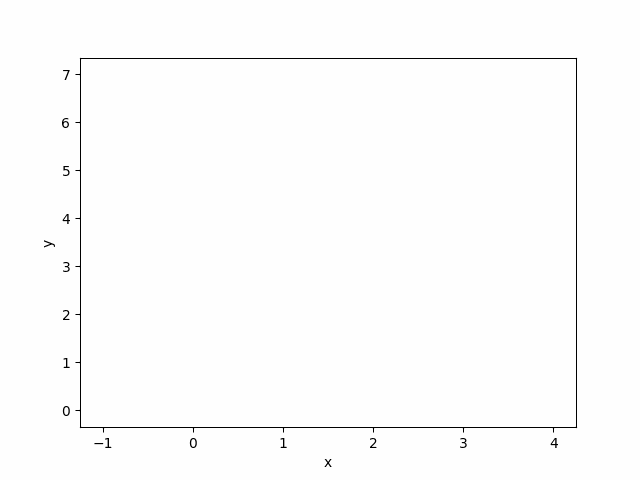

In [27]:
triang_vis=triangulation_vis(tested_polygon_two)
triang_vis.show_gif(interval=500)

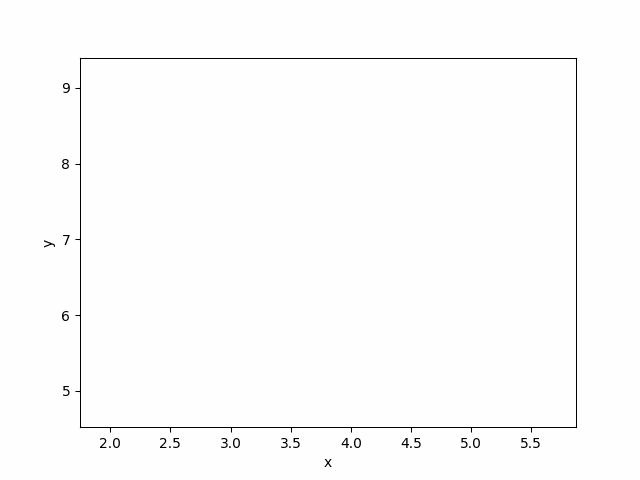

In [28]:
triang_vis=triangulation_vis(tested_polygon_three)
triang_vis.show_gif(interval=500)

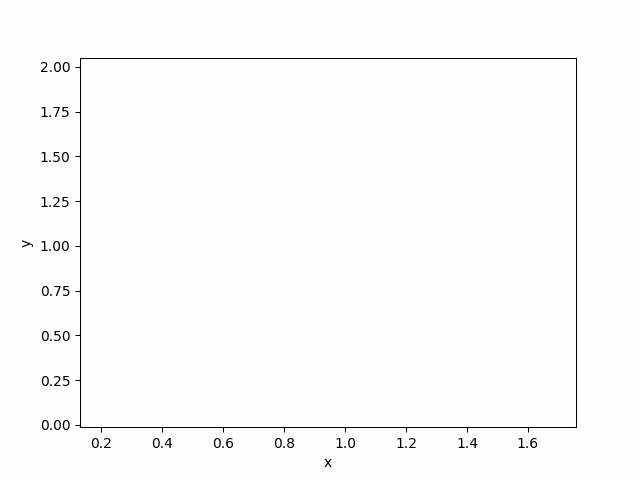

In [29]:
triang_vis=triangulation_vis(tested_polygon_four)
triang_vis.show_gif(interval=500)

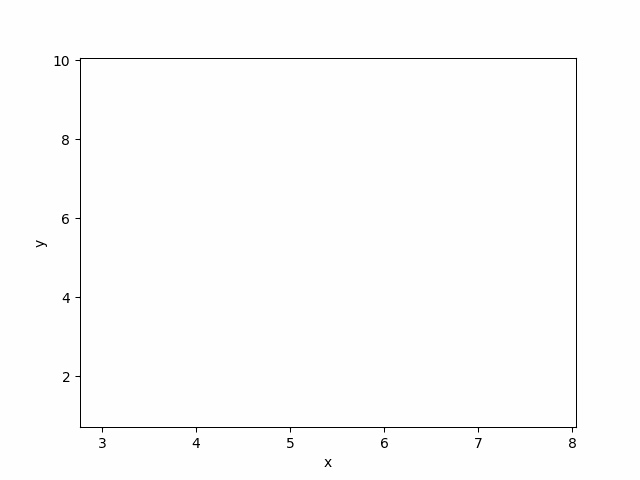

In [30]:
triang_vis=triangulation_vis(tested_polygon_six)
triang_vis.show_gif(interval=500)